# Introduction 
In this notebook I am going to make a multiple linear regression model for beginners who are new to python

# Overview 
Using a small public data set I have done basic visulaization and Model fitting
The data set could be found at 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("data50.csv",index_col=0)

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# Get the shape of the data
data.shape

(50, 5)

In [7]:
# Get data type
type(data)

pandas.core.frame.DataFrame

In [8]:
# Get types of each variable
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
# check for missing values
data.isnull().sum().sort_values(ascending=False)

Profit             0
State              0
Marketing Spend    0
Administration     0
R&D Spend          0
dtype: int64

In [10]:
# Check for percentage of missing values
(data.isnull().sum()/data.isnull().count())

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [11]:
# Table of Missing values
missing= data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count())
total= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
print(total)

                 Total  Percent
Administration       0      0.0
Marketing Spend      0      0.0
Profit               0      0.0
R&D Spend            0      0.0
State                0      0.0


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [12]:
# Get all the numberic variables
numeric= data.select_dtypes(include=[np.number])
numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [13]:
# Get all the categorical variables
categorical= data.select_dtypes(include=[np.object])
categorical

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


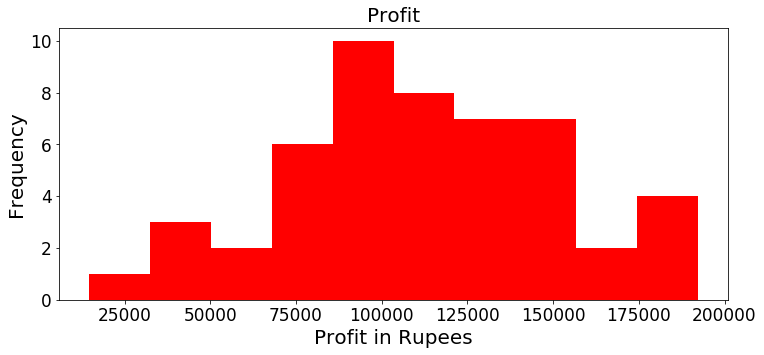

In [14]:
# Histogram of target variable
plt.figure(figsize=(12,5))
plt.hist(data["Profit"],color="red")
plt.title("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.xlabel("Profit in Rupees", size=20)
plt.tick_params(labelsize=17)
# plt.tick_params(labelsize=20)
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)
plt.show()

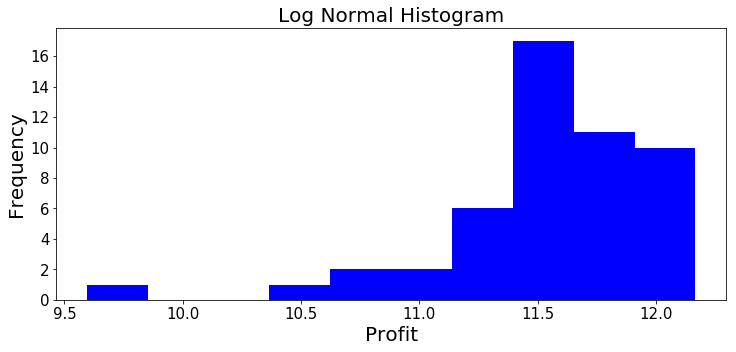

In [13]:
# Log normal histogram
target= np.log(data["Profit"])
plt.figure(figsize=(12,5))
plt.hist(target, color="blue")
plt.xlabel("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Log Normal Histogram", size=20)
plt.tick_params(labelsize=15)
plt.show()

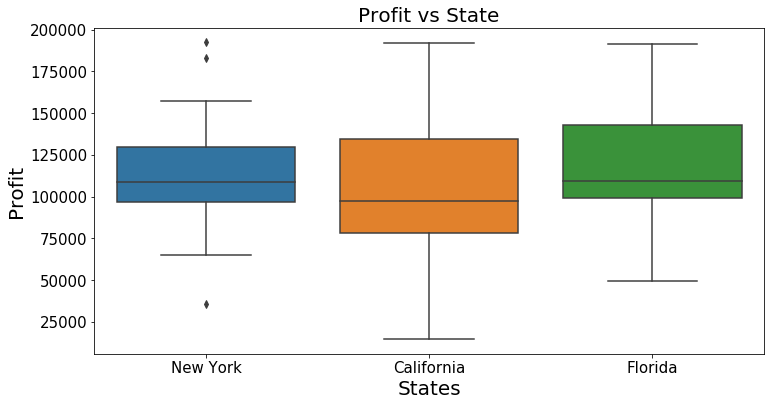

In [14]:
# Boxplot of Profit and Marketing spend
plt.figure(figsize=(12,6))
sns.boxplot(y="Profit", x="State", data=data)
plt.xlabel("States", size=20)
plt.ylabel("Profit", size=20)
plt.title("Profit vs State", size=20)
plt.tick_params(labelsize=15)
plt.show()

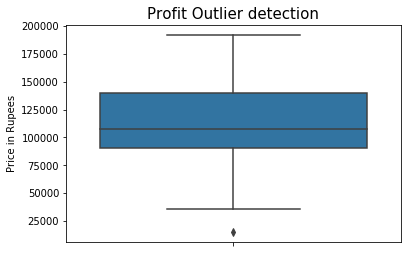

In [15]:
# Outlier detection
# plt.figure(figsize=(12,6))
sns.boxplot(data["Profit"],orient= "v")
plt.title("Profit Outlier detection", size=15)
plt.xlabel("", size=15)
plt.ylabel("Price in Rupees")
plt.show()

# Remove outlier
# data[data["Profit"] < 25000]
# data.drop(data[data["Profit"] < 20000].index)

In [16]:
# State is a categorical varible which we need to convert to numeric
data["State"].value_counts()

# So we will get 3 categories as 0,1,2

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [17]:
# Split the data into training and test set
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [18]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder= LabelEncoder()
X[:,3]= labelencoder.fit_transform(X[:, 3])

onehotencoder= OneHotEncoder(categorical_features=[3])
X= onehotencoder.fit_transform(X).toarray()

In [19]:
X.shape

(50, 6)

In [20]:
X[:,1:].shape

(50, 5)

In [21]:
# Avoiding the dummy variable trap
X=X[:,1:]
# print(X)

In [22]:
# Get correlation of numeric variables
correlation= numeric.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [23]:
# Get correlation with Profit
correlation["Profit"].sort_values(ascending=False)*100

Profit             100.000000
R&D Spend           97.290047
Marketing Spend     74.776572
Administration      20.071657
Name: Profit, dtype: float64

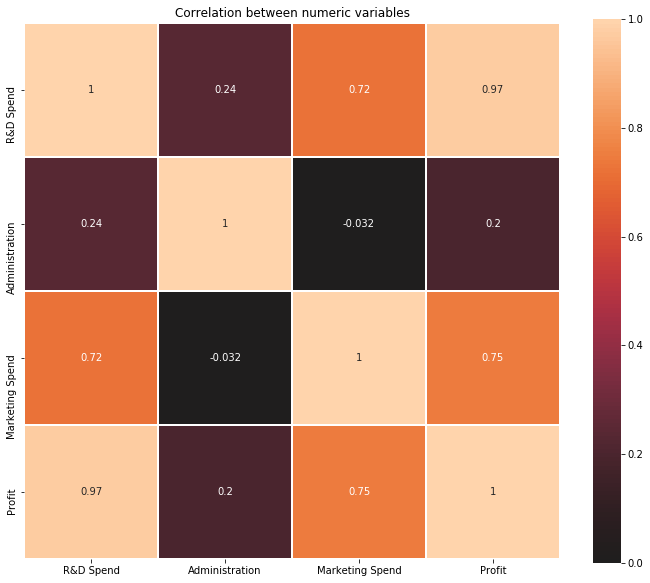

In [24]:
# Get heatmap 
plt.subplots(figsize=(12,10))
plt.title("Correlation between numeric variables")
sns.heatmap(correlation, square=True, vmin=0, vmax=1, center=0, annot=True, linewidths=0.5)
plt.show()

C:\Users\1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


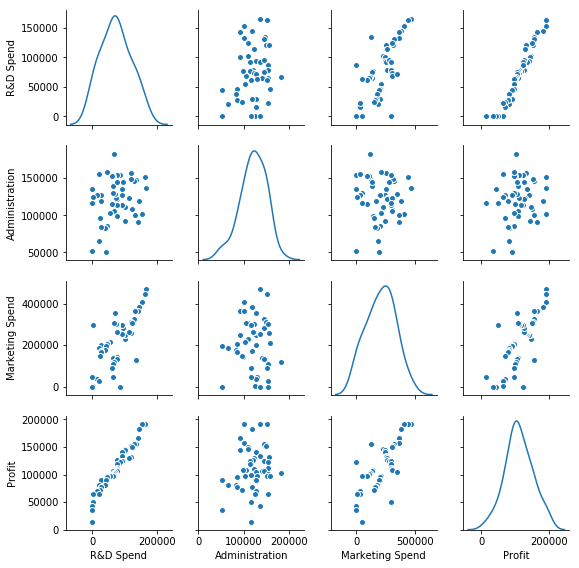

In [25]:
# Pairplot of numeric variables
columns= ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")
plt.show()

C:\Users\1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


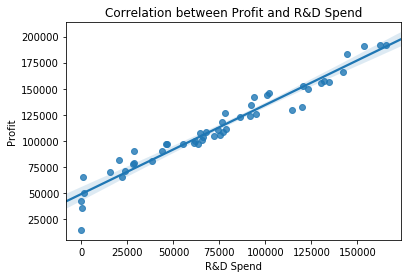

In [26]:
# Scatterplot
# scatterplot() function does not work insted use regplot()
sns.regplot(x="R&D Spend", y="Profit", data=data)
plt.title("Correlation between Profit and R&D Spend")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

plt.show()

C:\Users\1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


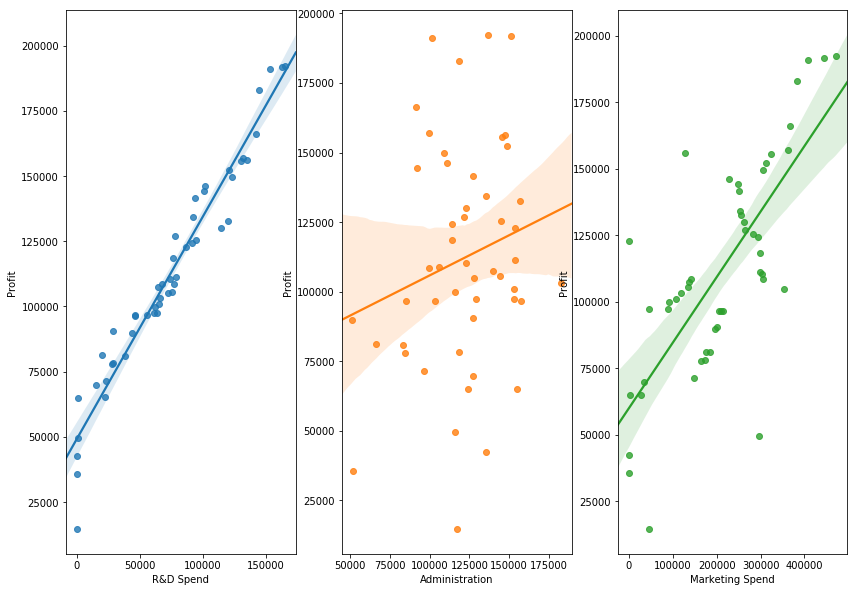

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(14,10))
sns.regplot(x='R&D Spend', y='Profit', scatter= True, data=data, ax=axs[0])
sns.regplot(x='Administration', y='Profit', scatter=True, data=data, ax=axs[1])
sns.regplot(x='Marketing Spend',y='Profit', scatter=True, data=data, ax=axs[2])


In [28]:
# Split data into training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

C:\Users\1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
# Fit linear regression
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Predict the test restul
pred= lm.predict(X_test)

In [31]:
# Get the coefficient
print(lm.intercept_)
print(lm.coef_)

49946.632759840446
[-3.47559066e+02 -1.89212737e+03  7.79550957e-01 -3.02197523e-02
  3.91135490e-02]


In [32]:
list(zip(data, lm.coef_))

[('R&D Spend', -347.5590663640196),
 ('Administration', -1892.1273682009733),
 ('Marketing Spend', 0.779550957444826),
 ('State', -0.030219752318203064),
 ('Profit', 0.03911354901083541)]

In [33]:
# Print R square
print("R square is {}:".format(lm.score(X_test,y_test)))

R square is 0.9754154859052407:


In [34]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [35]:
# Print Mean absolute error
print("MAE:", metrics.mean_absolute_error(pred, y_test))

MAE: 4686.945160909395


In [36]:
# Print root mean square error
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred, y_test)))

RMSE: 6246.578410350192
